In [ ]:
#!pip install catboost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import time
from catboost import Pool
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
test = pd.read_csv('./data/test.csv')

In [3]:
df = pd.read_pickle('./data/data_1.pkl')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8032887 entries, 827691 to 8860577
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   month_id                    int8   
 1   shop_id                     int8   
 2   item_id                     int16  
 3   cnt_month                   float32
 4   city_id                     int8   
 5   cat_id                      int8   
 6   main_cat                    int8   
 7   sub_cat                     int8   
 8   year                        int16  
 9   month                       int8   
 10  sales_month                 int8   
 11  cnt_month_1                 float32
 12  cnt_month_2                 float32
 13  cnt_month_3                 float32
 14  item_id_mean_cnt_1          float32
 15  item_id_mean_cnt_2          float32
 16  item_id_mean_cnt_3          float32
 17  sub_cat_mean_cnt_1          float32
 18  sub_cat_mean_cnt_2          float32
 19  sub_cat_mean_cnt

In [5]:
df.head()

,month_id,shop_id,item_id,cnt_month,city_id,cat_id,main_cat,sub_cat,year,month,...,sub_cat_mean_cnt_3,price_mean_mean_cnt_1,price_mean_mean_cnt_2,price_mean_mean_cnt_3,item_id/city_id_mean_cnt_1,item_id/city_id_mean_cnt_2,item_id/city_id_mean_cnt_3,shop_id/cat_id_mean_cnt_1,shop_id/cat_id_mean_cnt_2,shop_id/cat_id_mean_cnt_3
827691,3,25,8092,3.0,13,40,11,6,2013,4,...,0.0,1.400024,1.365631,0.0,1.000000,2.142857,0.0,1.087262,1.048394,0.0
827692,3,25,7850,3.0,13,30,8,54,2013,4,...,0.0,1.479122,1.464680,0.0,3.714286,2.285714,0.0,3.651685,2.276650,0.0
827693,3,25,8051,3.0,13,66,14,47,2013,4,...,0.0,0.000000,0.000000,0.0,0.000000,0.428571,0.0,1.827586,1.389474,0.0
827694,3,25,8088,1.0,13,55,13,4,2013,4,...,0.0,1.479122,0.000000,0.0,0.285714,0.000000,0.0,0.598291,0.562107,0.0
827695,3,25,8089,1.0,13,55,13,4,2013,4,...,0.0,0.000000,0.000000,0.0,0.571429,0.000000,0.0,0.598291,0.562107,0.0


In [6]:
s = ['cnt_month', 'cnt_month_1','cnt_month_2', 'cnt_month_3', 'item_id_mean_cnt_1','item_id_mean_cnt_2', 'item_id_mean_cnt_3', 
        'sub_cat_mean_cnt_1','sub_cat_mean_cnt_2', 'sub_cat_mean_cnt_3', 'price_mean_mean_cnt_1',
       'price_mean_mean_cnt_2', 'price_mean_mean_cnt_3','item_id/city_id_mean_cnt_1', 'item_id/city_id_mean_cnt_2',
       'item_id/city_id_mean_cnt_3', 'shop_id/cat_id_mean_cnt_1','shop_id/cat_id_mean_cnt_2', 'shop_id/cat_id_mean_cnt_3']

In [7]:
# value clip(0~20)
df[s] = df[s].clip(0, 20)

In [8]:
# train/validation/test data split
X_train = df[df['month_id'] < 33].drop(['cnt_month'], axis=1)
Y_train = df[df['month_id'] < 33]['cnt_month']

X_valid = df[df['month_id'] == 33].drop(['cnt_month'], axis=1)
Y_valid = df[df['month_id'] == 33]['cnt_month']

X_test = df[df['month_id'] == 34].drop(['cnt_month'], axis=1)

In [9]:
cat = ['shop_id', 'item_id', 'city_id', 'cat_id', 'main_cat', 'sub_cat'] # 범주형 데이터 설정

In [11]:
model = CatBoostRegressor(
    max_depth=10,              # 트리의 최대 깊이
    n_estimators = 1000,       # 최대 트리 수
    eta = 0.3,                 # 학습률 : 증감률을 줄이는데 사용
    random_seed=123           # 훈련에 사용되는 랜덤 시드
    )

In [12]:
ts = time.time()
model.fit(
    X_train, Y_train, 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)],  # 유효성 검사 데이터 세트
    cat_features=cat,                                    # 범주형 데이터 설정     
    verbose=True,                                      # True : 상세로그수준 / False : 자동로그수준 / int : 상세로그수준을 사용, 매개변수로 로깅기간 사용 
    early_stopping_rounds = 20                         # 검증횟수 설정
    )

print('소요시간: ',time.time()-ts)

0:	learn: 1.0791755	test: 1.0775861	test1: 0.9718481	best: 0.9718481 (0)	total: 23.4s	remaining: 6h 28m 50s
1:	learn: 0.9718026	test: 0.9653395	test1: 0.9158186	best: 0.9158186 (1)	total: 48.2s	remaining: 6h 40m 36s
2:	learn: 0.9076970	test: 0.8929031	test1: 0.8943279	best: 0.8943279 (2)	total: 1m 8s	remaining: 6h 21m 11s
3:	learn: 0.8670256	test: 0.8487464	test1: 0.8817107	best: 0.8817107 (3)	total: 1m 35s	remaining: 6h 37m 10s
4:	learn: 0.8406060	test: 0.8211954	test1: 0.8792583	best: 0.8792583 (4)	total: 2m 3s	remaining: 6h 50m 20s
5:	learn: 0.8249160	test: 0.8040946	test1: 0.8786228	best: 0.8786228 (5)	total: 2m 27s	remaining: 6h 48m 14s
6:	learn: 0.8140940	test: 0.7933390	test1: 0.8748622	best: 0.8748622 (6)	total: 2m 51s	remaining: 6h 44m 18s
7:	learn: 0.8031953	test: 0.7810822	test1: 0.8731280	best: 0.8731280 (7)	total: 3m 17s	remaining: 6h 48m 17s
8:	learn: 0.7971334	test: 0.7751384	test1: 0.8723808	best: 0.8723808 (8)	total: 3m 44s	remaining: 6h 51m 32s
9:	learn: 0.7908140	tes

In [14]:
Y_pred = model.predict(X_valid)

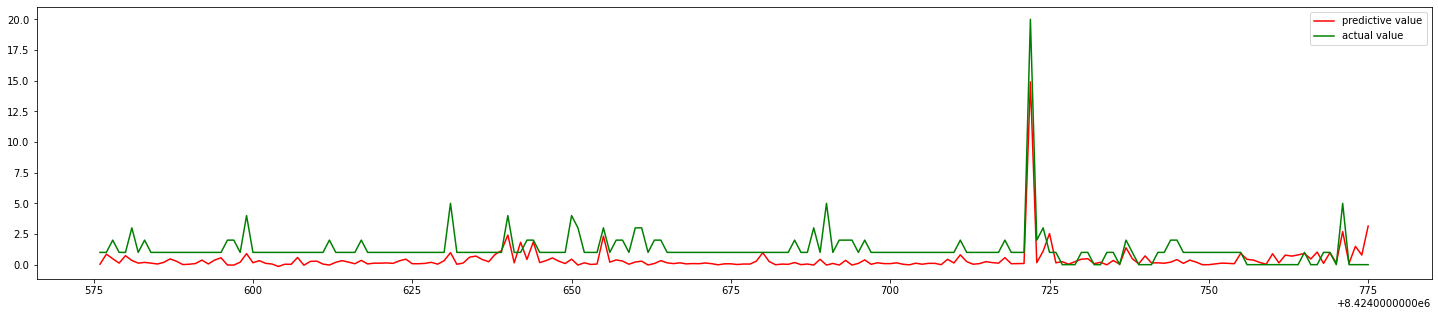

In [15]:
submission = pd.DataFrame({
    "ID": X_valid.index, 
    "item_cnt_month": Y_pred
})
x = submission['ID'].head(200)
y_pred = submission['item_cnt_month'].head(200)
y_true = Y_valid.head(200)
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(111)
ax.plot(x, y_pred, label = 'predictive value', color = 'red')
ax.plot(x, y_true, label = 'actual value', color = 'green')

ax.legend()

plt.show()

In [16]:
Y_test = model.predict(X_test)

In [28]:
# 제출 파일 생성
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('./submission/submission_CatBoost_2022022701.csv', index=False)